In [43]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import tensorflow.keras.layers as tfl
import numpy as np
import pandas as pd

In [36]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [37]:
x_train, x_test = x_train / 255., x_test / 255.


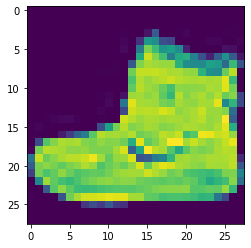

In [38]:
plt.imshow(x_train[0])

In [39]:
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [80]:
def conv_model(input_shape):
  Z0 = tf.keras.Input(shape = input_shape)

  Z1 = tfl.Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'same')(Z0)
  A1 = tfl.ReLU()(Z1)
  B1 = tfl.BatchNormalization()(A1)
  Z1_2 = tfl.Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), padding = 'same')(B1)
  A1_2 = tfl.ReLU()(Z1_2)
  B1_2 = tfl.BatchNormalization()(A1_2)
  Dr1 = tfl.Dropout(0.25)(B1)
  P1 = tfl.MaxPool2D(pool_size = (2, 2))(Dr1)

  Z2 = tfl.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), padding = 'same')(P1)
  A2 = tfl.ReLU()(Z2)
  B2 = tfl.BatchNormalization()(A2)
  Dr2 = tfl.Dropout(0.25)(B2)
  P2 = tfl.MaxPool2D(pool_size = (2, 2))(Dr2)

  # Z3 = tfl.Conv2D(filters = 20, kernel_size = (2, 2), strides = (1, 1), padding = 'same')(P2)
  # A3 = tfl.ReLU()(Z3)
  # B3 = tfl.BatchNormalization()(A3)
  # Dr3 = tfl.Dropout(0.25)(B3)

  F = tfl.Flatten()(P2)
  D1 = tfl.Dense(units = 512, activation = 'relu')(F)
  Dr3 = tfl.Dropout(0.5)(D1)
  D2 = tfl.Dense(units = 128, activation = 'relu')(Dr3)
  Dr4 = tfl.Dropout(0.5)(D2)
  outputs = tfl.Dense(units = 10, activation = 'softmax')(Dr4)

  model = tf.keras.Model(inputs = Z0, outputs = outputs)
  return model

In [81]:
model = conv_model((28, 28, 1))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [82]:
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 re_lu_22 (ReLU)             (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_22 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_34 (Dropout)        (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                     

In [83]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(64)
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(64)

history = model.fit(train_data, epochs = 10, validation_data = test_data)

Epoch 1/10
938/938 [==============================] - 147s 156ms/step - loss: 0.6963 - accuracy: 0.7652 - val_loss: 0.4344 - val_accuracy: 0.8452
Epoch 2/10
938/938 [==============================] - 143s 152ms/step - loss: 0.4171 - accuracy: 0.8568 - val_loss: 0.3435 - val_accuracy: 0.8821
Epoch 3/10
938/938 [==============================] - 143s 153ms/step - loss: 0.3510 - accuracy: 0.8783 - val_loss: 0.3233 - val_accuracy: 0.8846
Epoch 4/10
938/938 [==============================] - 143s 152ms/step - loss: 0.3239 - accuracy: 0.8861 - val_loss: 0.3811 - val_accuracy: 0.8693
Epoch 5/10
938/938 [==============================] - 144s 153ms/step - loss: 0.3034 - accuracy: 0.8938 - val_loss: 0.3227 - val_accuracy: 0.8887
Epoch 6/10
938/938 [==============================] - 144s 153ms/step - loss: 0.2855 - accuracy: 0.9003 - val_loss: 0.2984 - val_accuracy: 0.9017
Epoch 7/10
938/938 [==============================] - 145s 154ms/step - loss: 0.2699 - accuracy: 0.9063 - val_loss: 0.2745 -

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epoch')]

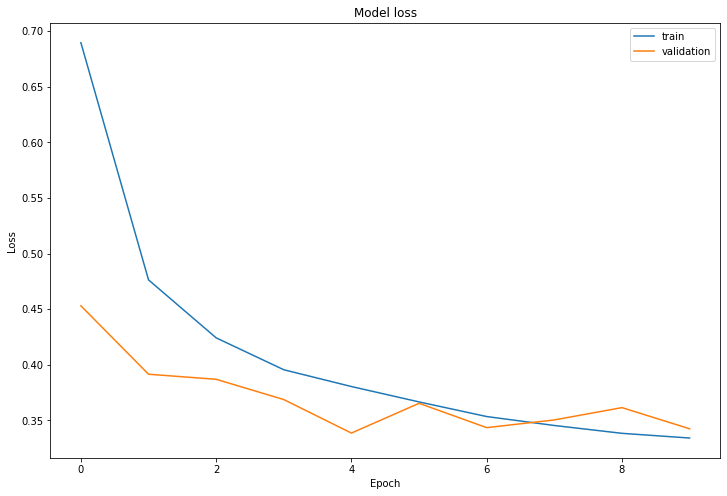

In [79]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')